# Iris Dataset

• Use the iris dataset Petal Length and Petal Width 
for Versicolor and Virginica species. 

In [22]:
# import the libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split

In [23]:
# Load dataset as a pandas DataFrame
iris = sns.load_dataset("iris")

# Filter for versicolor species,petal length and petal width
versicolor_iris = iris[iris['species'].isin(['versicolor'])][['petal_length', 'petal_width', 'species']].sample(n=50, random_state=42).reset_index(drop=True)

# Filter for virginica species,petal length and petal width
virginica_iris = iris[iris['species'].isin(['virginica'])][['petal_length', 'petal_width', 'species']].sample(n=50, random_state=42).reset_index(drop=True)


• Randomly select 40 points each from the two 
classes


In [24]:
# Split the versicolor data into 40-10

train_versicolor, test_versicolor = train_test_split(versicolor_iris, test_size=10, random_state=42)
df1=train_versicolor
df1.reset_index(drop=True,inplace=True)

# Split the virginica data into 40-10

train_virginica, test_virginica = train_test_split(virginica_iris, test_size=10, random_state=42)
df2=train_virginica
df2.reset_index(drop=True,inplace=True)

df=pd.concat([train_versicolor, train_virginica], axis=0, ignore_index=True)

 • Find the direction v using Fisher’s Linear 
Discriminant function and generate the plot with 
the data points and the direction v                       


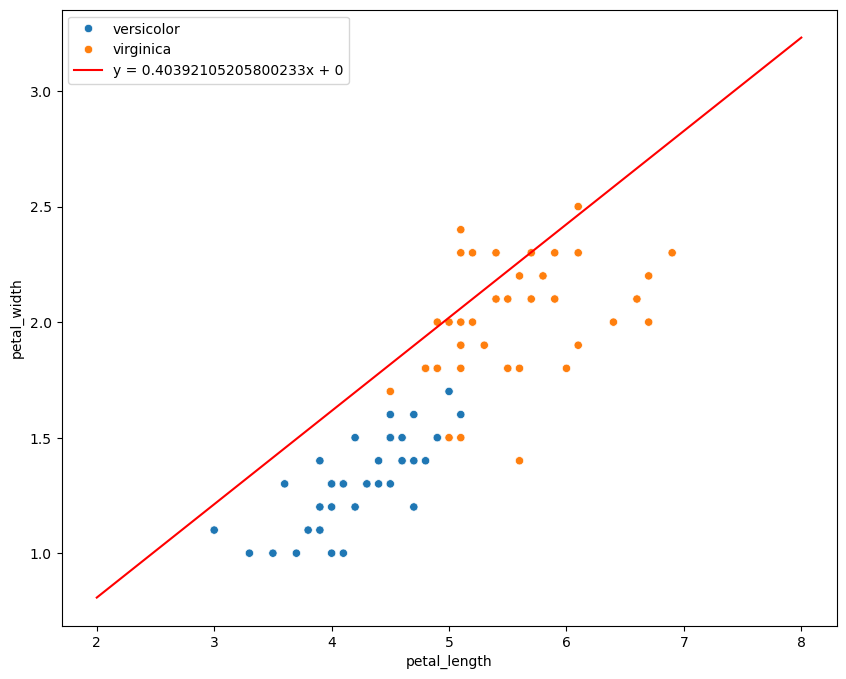

In [25]:
M_1_1=df1['petal_length'].mean() # Mean of petal length for versicolor

M_1_2=df1['petal_width'].mean() # Mean of petal width for virginica

# difference of mean of petal length for versicolor
Diff_1_1=[]
for i in range(len(df1)):
    diff_1_1=df1['petal_length'].iloc[i]-M_1_1
    Diff_1_1.append(diff_1_1)

# difference of mean of petal width for versicolor
Diff_1_2=[]
for i in range(len(df1)):
    diff_1_2=df1['petal_width'].iloc[i]-M_1_2
    Diff_1_2.append(diff_1_2)

df_S=pd.DataFrame({"Diff_1_1":Diff_1_1,"Diff_1_2":Diff_1_2})

#Scatterness of versicolor
S_1_Square=np.array([[0,0],[0,0]])

for i in range(len(df1)):
    S_1_Square=np.array([[df_S["Diff_1_1"].iloc[i]],[df_S["Diff_1_2"].iloc[i]]])@np.array([df_S.iloc[i]])+S_1_Square

#SAME PROCESS FOR VIRGINICA

M_0_1=df2['petal_length'].mean()
M_0_2=df2['petal_width'].mean()

Diff_0_1=[]
for i in range(len(df2)):
    diff_0_1=df2['petal_length'].iloc[i]-M_0_1
    Diff_0_1.append(diff_0_1)

Diff_0_2=[]
for i in range(len(df2)):
    diff_0_2=df2['petal_width'].iloc[i]-M_0_2
    Diff_0_2.append(diff_0_2)

df_S=pd.DataFrame({"Diff_0_1":Diff_0_1,"Diff_0_2":Diff_0_2})
df_S

S_0_Square=np.array([[0,0],[0,0]])

for i in range(len(df2)):
    S_0_Square=np.array([[df_S["Diff_0_1"].iloc[i]],[df_S["Diff_0_2"].iloc[i]]])@np.array([df_S.iloc[i]])+S_0_Square
S_0_Square

# Sum of scatterness of both the classes

S_W=S_1_Square+S_0_Square

# Inverse

S_W_inv = np.linalg.inv(S_W)

# Mean of versicolor-Mean of virginica
M_1=np.array([[M_1_1],[M_1_2]])

M_0=np.array([[M_0_1],[M_0_2]])

(M_1-M_0)

#Computing v

v=S_W_inv@(M_1-M_0)
v

# Calcutating the origin 
df['petal_length'].mean()
df['petal_width'].mean()

#Plotting LDA

# Scatter plot of training data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

m=(v[0][0]-df2['petal_width'].mean())/(v[1][0]-df['petal_length'].mean())

# Generate x values
x = np.linspace(2, 8, 100)

# Compute y values
y = m * x + 0

# Plot the line
plt.plot(x, y, 'r-', label=f'y = {m}x + {0}')
plt.legend()
plt.show()




• Projecting all the points on v

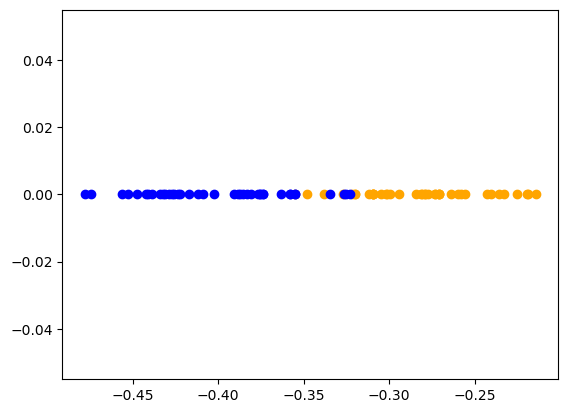

In [26]:
# projecting the points

Proj_versicolor=[]
for i in range(0,len(train_versicolor)):
    Y=[v[0][0],v[1][0]]@np.array([train_versicolor.iloc[i][0],train_versicolor.iloc[i][1]])
    Proj_versicolor.append(Y)

Proj_virginica=[]
for i in range(0,len(train_virginica)):
    Y=[v[0][0],v[1][0]]@np.array([train_virginica.iloc[i][0],train_virginica.iloc[i][1]])
    Proj_virginica.append(Y)

plt.scatter(Proj_versicolor,np.zeros_like(Proj_versicolor),c='orange')

plt.scatter(Proj_virginica,np.zeros_like(Proj_virginica),c='blue')

 criterion for classification

In [27]:
#virginica if less than min(Proj_versicolor)

#versicolor if more than max(Proj_virginica)

#[min(Proj_versicolor),max(Proj_virginica)] -Cannot be classified

print(min(Proj_versicolor))
print(max(Proj_virginica))

-0.35512633665360055
-0.3228384700416687


• Classify the remaining 10 points for each class and report the accuracy.

In [28]:
# remaining 10 data for versicolor 
df1=test_versicolor
df1.reset_index(drop=True,inplace=True)

# remaining 10 data for virginica
df2=train_virginica
df2.reset_index(drop=True,inplace=True)

P_versicolor=[]
for i in range(0,len(test_versicolor)):
    Y=[v[0][0],v[1][0]]@np.array([test_versicolor.iloc[i][0],test_versicolor.iloc[i][1]])
    P_versicolor.append(Y)

P_virginica=[]
for i in range(0,len(test_virginica)):
    Y=[v[0][0],v[1][0]]@np.array([test_virginica.iloc[i][0],test_virginica.iloc[i][1]])
    P_virginica.append(Y)

Class1=[]
for i in P_versicolor:
    if i < min(Proj_versicolor):
        C='virginica'
        Class1.append(C)
    elif i>max(Proj_virginica):
        C='versicolor'
        Class1.append(C)
    else:
        C='Cannot be decided'
        Class1.append(C)
print("Classification of Versicolor: \n",Class1)

Class2=[]
for i in P_virginica:
    if i < min(Proj_versicolor):
        C='virginica'
        Class2.append(C)
    elif i>max(Proj_virginica):
        C='versicolor'
        Class2.append(C)
    else:
        C='Cannot be decided'
        Class2.append(C)
print("Classification of Virginica : \n",Class2)

Classification of Versicolor: 
 ['versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor']
Classification of Virginica : 
 ['virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']


In [29]:
count=0
for i in Class1:
    if i=='versicolor':
        count=count+1
Accuracy_versicolor=count/len(Class1+Class2)

count=0
for i in Class2:
    if i=='virginica':
        count=count+1
Accuracy_virginica=count/len(Class1+Class2)

Accuracy=Accuracy_versicolor+Accuracy_virginica
print("the accuracy is: \n",Accuracy)

the accuracy is: 
 1.0


--------------------------------------

# Normal Distribution

 • Generate a dataset of two classes each having 50 
points as follows from Normal distribution
 Mean at (-2,-2) Standard Deviation of 1 → Class A
 Mean at (2,2) Standard Deviation of 2 → Class B
 

In [30]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 points for class 1 (mean = (-2,-2), std = 1)
class_1 = np.random.normal(loc=[-2, -2], scale=1, size=(50, 2))
class_1 = np.round(class_1, 2)
labels_1 = np.full((50, 1),"A")  

# Generate 50 points for class 2 (mean = (2,2), std = 2)
class_2 = np.random.normal(loc=[2, 2], scale=2, size=(50, 2))
class_2 = np.round(class_2, 2)
labels_2 = np.full((50, 1),"B")  

# Combine the data
X = np.vstack((class_1, class_2))
y = np.concatenate((labels_1, labels_2))

dataset = np.hstack((X, y))

df = pd.DataFrame(dataset, columns=["Feature_1", "Feature_2", "Class"])

df

,Feature_1,Feature_2,Class
0,-1.5,-2.14,A
1,-1.35,-0.48,A
2,-2.23,-2.23,A
3,-0.42,-1.23,A
4,-2.47,-1.46,A
...,...,...,...
95,1.11,3.71,B
96,2.43,-0.49,B
97,2.35,2.77,B
98,0.23,2.31,B


• Find the direction v using Fisher’s Linear 
Discriminant function and generate the plot as 
shown                                                                         
 

In [31]:
df1=df[df['Class'].isin(['A'])]

df2=df[df['Class'].isin(['B'])]

df1.reset_index(drop=True,inplace=True)

df2.reset_index(drop=True,inplace=True)

In [32]:
df1

,Feature_1,Feature_2,Class
0,-1.5,-2.14,A
1,-1.35,-0.48,A
2,-2.23,-2.23,A
3,-0.42,-1.23,A
4,-2.47,-1.46,A
5,-2.46,-2.47,A
6,-1.76,-3.91,A
7,-3.72,-2.56,A
8,-3.01,-1.69,A
9,-2.91,-3.41,A


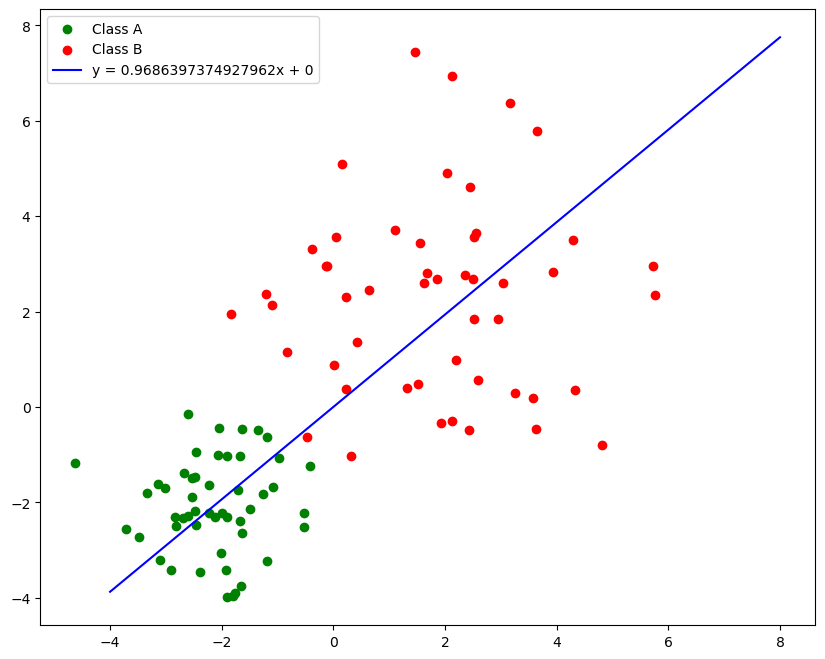

In [33]:
df1['Feature_1'] = pd.to_numeric(df1['Feature_1'])
df1['Feature_2'] = pd.to_numeric(df1['Feature_2'])

M_1_1=df1['Feature_1'].mean() # Mean of Feature_1 for ClassA

M_1_2=df1['Feature_2'].mean() # Mean of Feature_2 for ClassA

# difference of mean of Feature_1  for A
Diff_1_1=[]
for i in range(len(df1)):
    diff_1_1=df1['Feature_1'].iloc[i]-M_1_1
    Diff_1_1.append(diff_1_1)

# difference of mean of Feature_2  for A
Diff_1_2=[]
for i in range(len(df1)):
    diff_1_2=df1['Feature_2'].iloc[i]-M_1_2
    Diff_1_2.append(diff_1_2)

df_S=pd.DataFrame({"Diff_1_1":Diff_1_1,"Diff_1_2":Diff_1_2})

#Scatterness of ClassA
S_1_Square=np.array([[0,0],[0,0]])

for i in range(len(df1)):
    S_1_Square=np.array([[df_S["Diff_1_1"].iloc[i]],[df_S["Diff_1_2"].iloc[i]]])@np.array([df_S.iloc[i]])+S_1_Square

#SAME PROCESS FOR ClassB
df2['Feature_1'] = pd.to_numeric(df2['Feature_1'])
df2['Feature_2'] = pd.to_numeric(df2['Feature_2'])

M_0_1=df2['Feature_1'].mean()
M_0_2=df2['Feature_2'].mean()

Diff_0_1=[]
for i in range(len(df2)):
    diff_0_1=df2['Feature_1'].iloc[i]-M_0_1
    Diff_0_1.append(diff_0_1)

Diff_0_2=[]
for i in range(len(df2)):
    diff_0_2=df2['Feature_2'].iloc[i]-M_0_2
    Diff_0_2.append(diff_0_2)

df_S=pd.DataFrame({"Diff_0_1":Diff_0_1,"Diff_0_2":Diff_0_2})
df_S

S_0_Square=np.array([[0,0],[0,0]])

for i in range(len(df2)):
    S_0_Square=np.array([[df_S["Diff_0_1"].iloc[i]],[df_S["Diff_0_2"].iloc[i]]])@np.array([df_S.iloc[i]])+S_0_Square
S_0_Square

# Sum of scatterness of both the classes

S_W=S_1_Square+S_0_Square

# Inverse

S_W_inv = np.linalg.inv(S_W)

# Mean of ClassA-Mean of ClassB
M_1=np.array([[M_1_1],[M_1_2]])

M_0=np.array([[M_0_1],[M_0_2]])

(M_1-M_0)

#Computing v

v=S_W_inv@(M_1-M_0)
v

# Calcutating the origin 
df['Feature_1'] = pd.to_numeric(df1['Feature_1'])
df['Feature_2'] = pd.to_numeric(df1['Feature_2'])

df['Feature_1'].mean()
df['Feature_2'].mean()

#Plotting LDA

# Scatter plot of training data
plt.figure(figsize=(10, 8))
plt.scatter(class_1[:, 0], class_1[:, 1], color='green', label='Class A')
plt.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class B')

m=(v[0][0]-df['Feature_2'].mean())/(v[1][0]-df['Feature_1'].mean())

# Generate x values
x = np.linspace(-4, 8, 100)

# Compute y values
y = m * x + 0

# Plot the line
plt.plot(x, y, 'b', label=f'y = {m}x + {0}')
plt.legend()
plt.show()




• Project all the 100 points on v
 

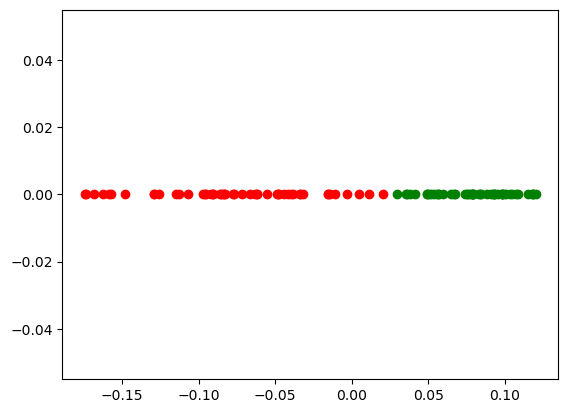

In [37]:
# projecting the points

Proj_A=[]
for i in range(0,len(df1)):
    Y=[v[0][0],v[1][0]]@np.array([df1.iloc[i][0],df1.iloc[i][1]])
    Proj_A.append(Y)

Proj_B=[]
for i in range(0,len(df2)):
    Y=[v[0][0],v[1][0]]@np.array([df2.iloc[i][0],df2.iloc[i][1]])
    Proj_B.append(Y)

plt.scatter(Proj_A,np.zeros_like(Proj_A),c='green')

plt.scatter(Proj_B,np.zeros_like(Proj_B),c='red')

 • Create your own criterion for classification.        


In [35]:
print(np.round(min(Proj_A),2))
print(np.round(max(Proj_B),2))

#if new data>=min(Proj_A)--Then ClassA
#if new data<=max(Proj_B)--Then ClassB

0.03
0.02


• Classify the following points based on your 
criterion: (0,0), (0,-0.5),(0.5,0) 

In [36]:
new=[]

#for(0,0) projected:
Y=[v[0][0],v[1][0]]@np.array([0,0])
new.append(np.round(Y,2))

#for(0,-0.5) projected:
Z=[v[0][0],v[1][0]]@np.array([0,-0.5])
new.append(np.round(Z,2))

#for(0,-0.5) projected:
X=[v[0][0],v[1][0]]@np.array([0.5,0])
new.append(np.round(X,2))

C=[]
for i in new:
    if i>=np.round(min(Proj_A),2):
        C.append("A")
    elif i<=np.round(max(Proj_B),2):
        C.append("B")
    else:
        C.append("Cannot be classified")
print(new)
C

[0.0, 0.01, -0.01]


['B', 'B', 'B']

----